In [7]:
import matplotlib.pyplot as plt 
import numpy as np

from pathlib import Path 
from sklearn.preprocessing import normalize
from tmap import TemporalMAP
from tmap.utils import plot_embeddings

### load some tracking data

Note that the tracking data here is just an array (*n_i*, 32) for *n_i* consecutive time points (i.e. a track with length *n_i*) with 32 features per time point. 

In [17]:
PATH = Path("./data/")
FILE = PATH / "trimmed_tracks.npy"

In [22]:
tracks_raw = np.load(FILE)

In [27]:
tracks = [tracks_raw[tracks_raw[:, 0] == idx, 1:] for idx in np.unique(tracks_raw[:, 0])]

### iterate over the number of neighbors and plot the tmap embeddings for the trajectories

Embedding: 100%|██████████| 200/200 [00:00<00:00, 1055.50it/s]


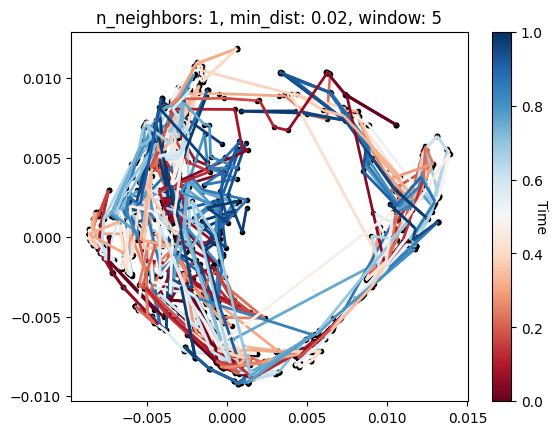

Embedding: 100%|██████████| 200/200 [00:00<00:00, 1194.01it/s]


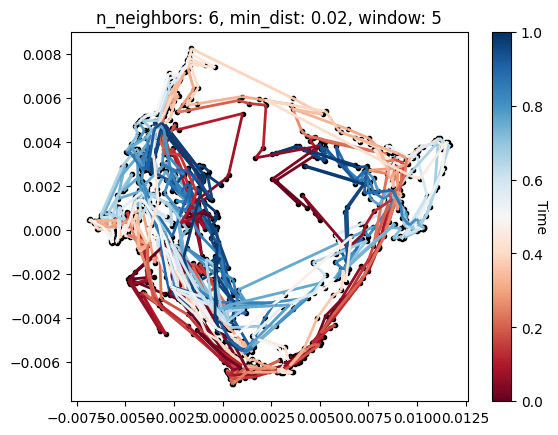

Embedding: 100%|██████████| 200/200 [00:00<00:00, 1049.33it/s]


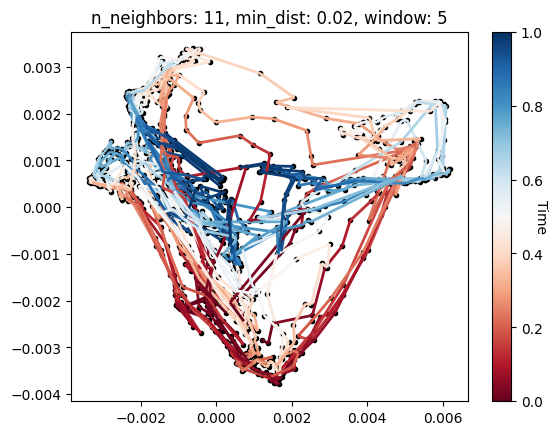

Embedding: 100%|██████████| 200/200 [00:00<00:00, 1264.79it/s]


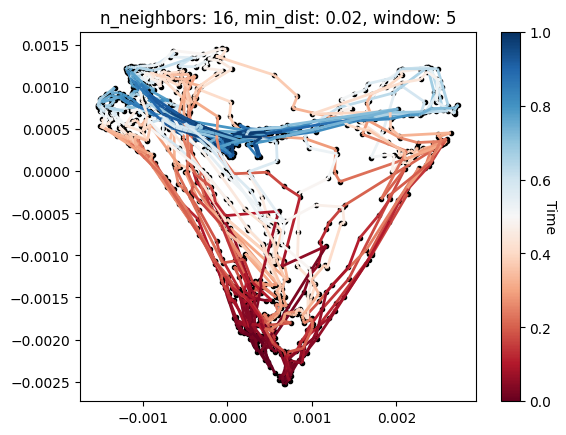

Embedding: 100%|██████████| 200/200 [00:00<00:00, 1086.52it/s]


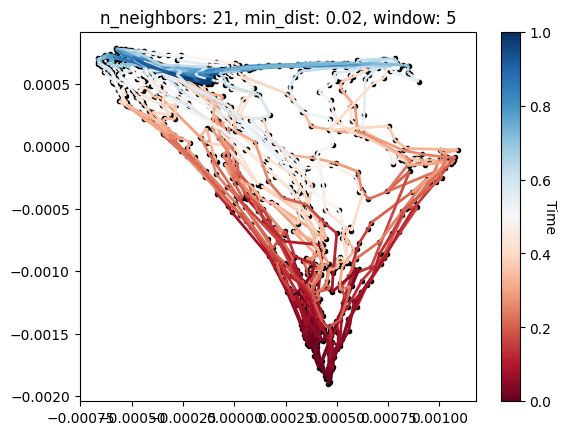

Embedding: 100%|██████████| 200/200 [00:00<00:00, 1212.42it/s]


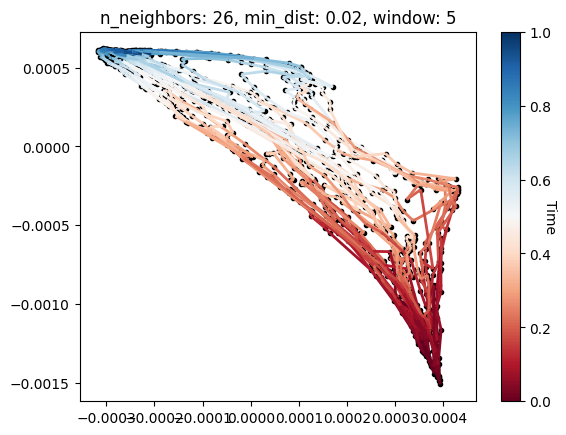

In [ ]:
for p in np.arange(1, 31, 5):
    mapper = TemporalMAP(min_dist=0.02, n_neighbors=p, window=5)
    _ = mapper.fit(tracks[:30]) # only use the first 30 tracks to speed this up
    plot_embeddings(mapper)